In [140]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing as pre
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [124]:
movies = pd.read_csv('movies.dat', header=None, sep='::', engine='python', encoding='latin-1', names=["MovieID","Title","Genre"])
ratings = pd.read_csv('ratings.dat', header=None, sep='::', engine='python', encoding='latin-1', names=["UserID","MovieID","Rating","Timestamp"])
users = pd.read_csv('users.dat', header=None, sep='::', engine='python', encoding='latin-1', names=["UserID","Gender","Age","Occupation","Zip-code"])
print(movies)
print(users)
print(ratings)

      MovieID                               Title  \
0           1                    Toy Story (1995)   
1           2                      Jumanji (1995)   
2           3             Grumpier Old Men (1995)   
3           4            Waiting to Exhale (1995)   
4           5  Father of the Bride Part II (1995)   
...       ...                                 ...   
3878     3948             Meet the Parents (2000)   
3879     3949          Requiem for a Dream (2000)   
3880     3950                    Tigerland (2000)   
3881     3951             Two Family House (2000)   
3882     3952               Contender, The (2000)   

                             Genre  
0      Animation|Children's|Comedy  
1     Adventure|Children's|Fantasy  
2                   Comedy|Romance  
3                     Comedy|Drama  
4                           Comedy  
...                            ...  
3878                        Comedy  
3879                         Drama  
3880                         D

In [125]:
# Check for null values in a column 

print(movies.isnull().sum())
print(users.isnull().sum())
print(ratings.isnull().sum())

MovieID    0
Title      0
Genre      0
dtype: int64
UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64


In [126]:
# Encoding Gender

encode = pre.LabelEncoder()
encode.fit(["M","F"])
users["Gender"] = encode.transform(users["Gender"])
print(users)

      UserID  Gender  Age  Occupation Zip-code
0          1       0    1          10    48067
1          2       1   56          16    70072
2          3       1   25          15    55117
3          4       1   45           7    02460
4          5       1   25          20    55455
...      ...     ...  ...         ...      ...
6035    6036       0   25          15    32603
6036    6037       0   45           1    76006
6037    6038       0   56           1    14706
6038    6039       0   45           0    01060
6039    6040       1   25           6    11106

[6040 rows x 5 columns]


In [127]:
# Seperate Title and year

movies["Year"] = movies["Title"].str.split("(", expand=True)[1]
movies["Title"] = movies["Title"].str.split("(", expand=True)[0]
movies["Year"] = movies["Year"].str.strip(")")
print(movies)

      MovieID                         Title                         Genre  \
0           1                    Toy Story    Animation|Children's|Comedy   
1           2                      Jumanji   Adventure|Children's|Fantasy   
2           3             Grumpier Old Men                 Comedy|Romance   
3           4            Waiting to Exhale                   Comedy|Drama   
4           5  Father of the Bride Part II                         Comedy   
...       ...                           ...                           ...   
3878     3948             Meet the Parents                         Comedy   
3879     3949          Requiem for a Dream                          Drama   
3880     3950                    Tigerland                          Drama   
3881     3951             Two Family House                          Drama   
3882     3952               Contender, The                 Drama|Thriller   

      Year  
0     1995  
1     1995  
2     1995  
3     1995  
4     1995

In [128]:
# Converting Genre as columns

genres = movies["Genre"].str.get_dummies().astype(int)
data = movies.join(genres)
data=data.drop(["Genre"],axis=1)
print(data)

      MovieID                         Title  Year  Action  Adventure  \
0           1                    Toy Story   1995       0          0   
1           2                      Jumanji   1995       0          1   
2           3             Grumpier Old Men   1995       0          0   
3           4            Waiting to Exhale   1995       0          0   
4           5  Father of the Bride Part II   1995       0          0   
...       ...                           ...   ...     ...        ...   
3878     3948             Meet the Parents   2000       0          0   
3879     3949          Requiem for a Dream   2000       0          0   
3880     3950                    Tigerland   2000       0          0   
3881     3951             Two Family House   2000       0          0   
3882     3952               Contender, The   2000       0          0   

      Animation  Children's  Comedy  Crime  Documentary  ...  Fantasy  \
0             1           1       1      0            0  ...  

In [129]:
# Merging datasets into a single dataset

final_data = ratings.merge(users, on="UserID")
final_data = final_data.merge(data, on="MovieID")
print(final_data)

         UserID  MovieID  Rating  Timestamp  Gender  Age  Occupation Zip-code  \
0             1     1193       5  978300760       0    1          10    48067   
1             2     1193       5  978298413       1   56          16    70072   
2            12     1193       4  978220179       1   25          12    32793   
3            15     1193       4  978199279       1   25           7    22903   
4            17     1193       5  978158471       1   50           1    95350   
...         ...      ...     ...        ...     ...  ...         ...      ...   
1000204    5949     2198       5  958846401       1   18          17    47901   
1000205    5675     2703       3  976029116       1   35          14    30030   
1000206    5780     2845       1  958153068       1   18          17    92886   
1000207    5851     3607       5  957756608       0   18          20    55410   
1000208    5938     2909       4  957273353       1   25           1    35401   

                           

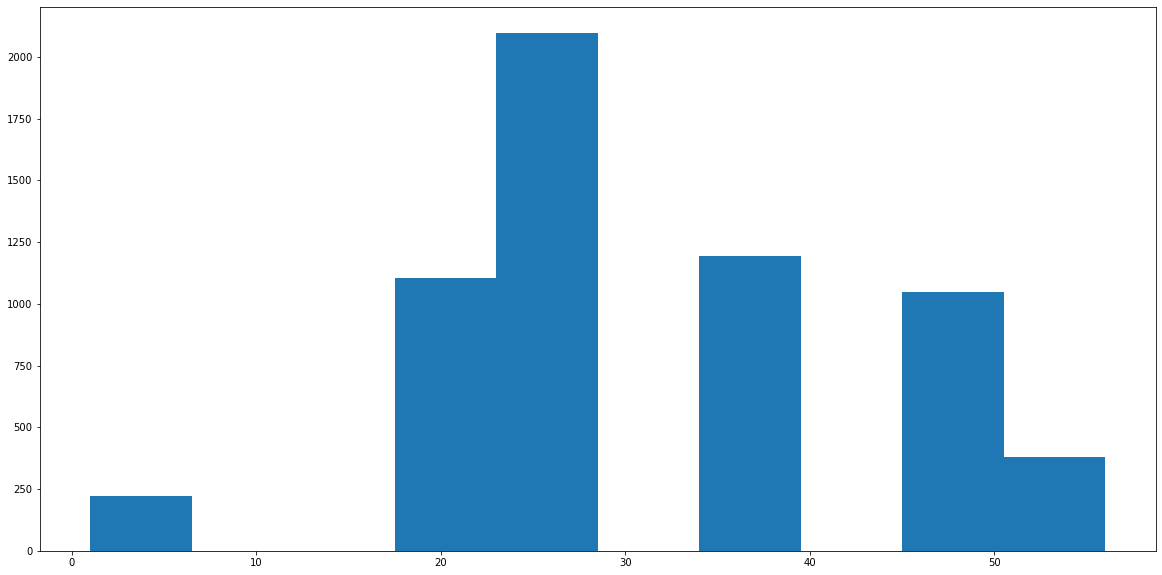

In [130]:
# Visualize user age distribution

plt_1 = plt.figure(figsize=(20,10))
plt.hist(users["Age"])
plt.show()

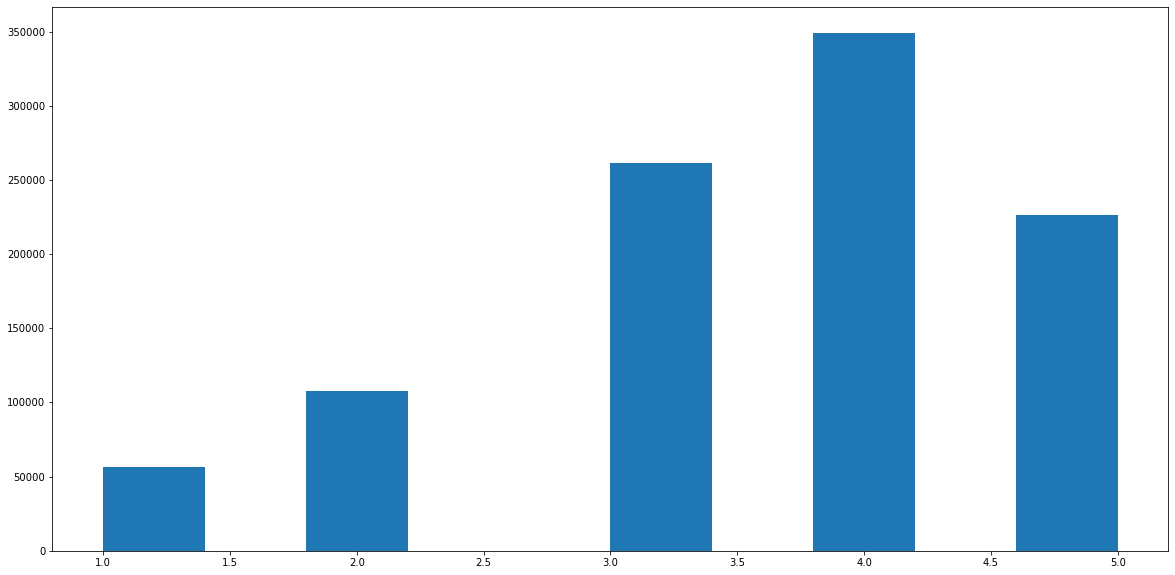

In [131]:
# Visualize overall rating by users

plt_1 = plt.figure(figsize=(20,10))
plt.hist(ratings["Rating"])
plt.show()

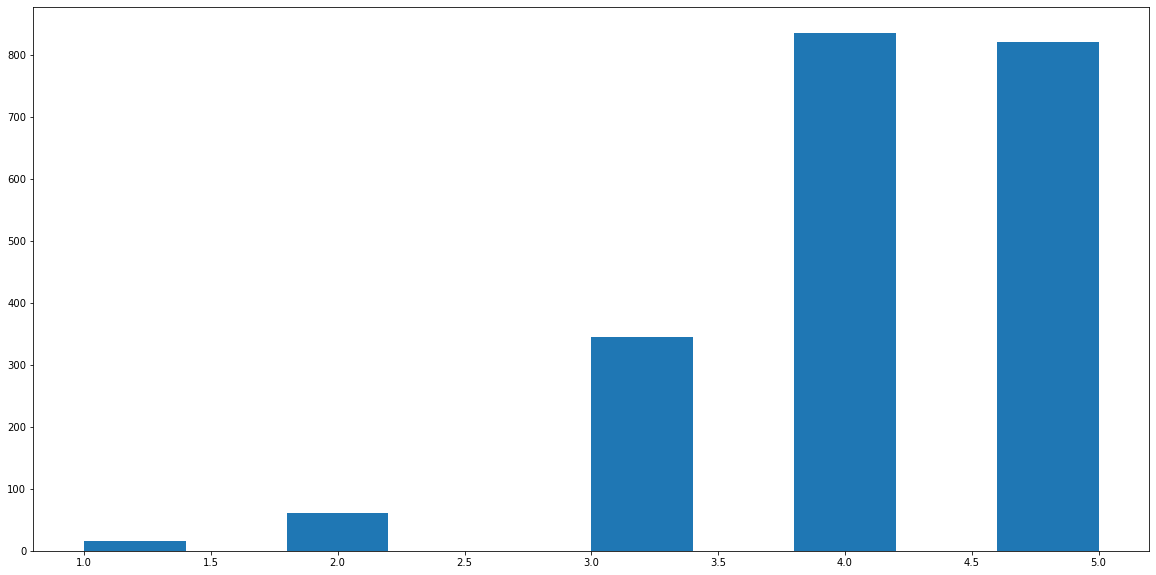

In [132]:
# Find and visualize the user rating of the movie “Toy Story”

plt_1 = plt.figure(figsize=(20,10))
toy_story = final_data.loc[final_data["Title"] == "Toy Story "]
plt.hist(toy_story["Rating"])
plt.show()

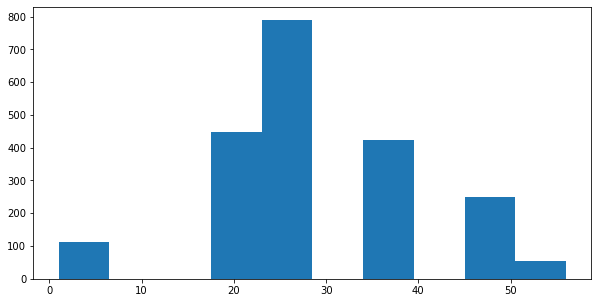

In [133]:
# Find and visualize the viewership of the movie “Toy Story” by age group

plt_1 = plt.figure(figsize=(10,5))
toy_story = final_data.loc[final_data["Title"] == "Toy Story "]
plt.hist(toy_story["Age"])
plt.show()

In [134]:
# Find and visualize the top 25 movies by viewership rating

top_movies = final_data.sort_values(by=["Rating"], ascending=False)
movies = top_movies["Title"].unique()
movies = pd.DataFrame(movies)
print(movies.head(25))

                                   0
0   One Flew Over the Cuckoo's Nest 
1                         Bowfinger 
2             Spy Who Loved Me, The 
3   On Her Majesty's Secret Service 
4                    Before Sunrise 
5                 Last Emperor, The 
6                      Best in Show 
7     Bridge on the River Kwai, The 
8                           Othello 
9                              Toys 
10                  Ordinary People 
11                            Naked 
12                   Bird on a Wire 
13           Four Days in September 
14                          Orlando 
15                            Bound 
16                    Mars Attacks! 
17           Wings of the Dove, The 
18               Kull the Conqueror 
19                        Rambo III 
20           Fox and the Hound, The 
21                    Donnie Brasco 
22                 Maybe, Maybe Not 
23       Rambo: First Blood Part II 
24     Man with the Golden Gun, The 


In [135]:
# Find the rating for a particular user of user id = 2696

toy_story = final_data["Rating"].loc[final_data["UserID"] == 2696]
print(toy_story)

24345     2
29848     3
244232    4
250014    5
273633    1
277808    4
371178    4
377250    3
598042    4
603189    4
609204    4
611956    2
612552    4
613486    4
616546    4
618708    4
621101    1
689379    4
697451    2
777089    3
Name: Rating, dtype: int64


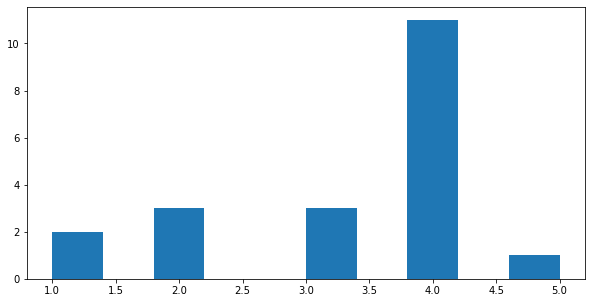

In [136]:
# Visualize the rating data by user of user id = 2696

plt_1 = plt.figure(figsize=(10,5))
plt.hist(toy_story)
plt.show()

In [137]:
x = final_data[["Gender","Age","Occupation"]]
y = final_data[["MovieID"]]
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size = 0.25, random_state= 0)
model = LinearRegression()
model.fit(x_train, y_train)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
y_pred = model.predict(x_test)
print(y_pred)
print(y_test)

intercept: [1740.69639685]
slope: [[55.29567074  2.55328156  0.83607829]]
[[1885.35692216]
 [1874.03743756]
 [1920.92267727]
 ...
 [1845.29544883]
 [1847.80368371]
 [1751.61046135]]
        MovieID
324271     2406
818637     2071
148677     3809
778790     1390
525489     3175
...         ...
180617     3893
159277      349
110831     1225
288687     1653
703743     3752

[250053 rows x 1 columns]


In [143]:
x = final_data[["Gender","Age"]]
y = final_data[["MovieID"]]
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size = 0.25)
decision = DecisionTreeClassifier()
reg = decision.fit(x_train,y_train)
y_pred = decision.predict(x_test)
print(y_pred)
print(y_test)
accuracy_score(y_test,y_pred)

[2762 2858 2858 ... 2858 2858  260]
        MovieID
555508     2706
152620     1957
831938      837
416420     3916
143208     1917
...         ...
718907     3052
938506     2084
665945      261
579277       10
579015     3479

[250053 rows x 1 columns]


0.003407277657136687

In [ ]:

classifier = KNeighborsClassifier(n_neighbors = 8)